In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
#paths
# Specify the path to the zip file and the directory to extract to
zip_file = r"C:\Users\HP\Documents\Studies\CBSMaster\2ndSemester\MLDL\Exam\OASISDataset.zip"
extract_to = r"C:\Users\HP\Documents\Studies\CBSMaster\2ndSemester\MLDL\Exam"
data_dir = r"C:\Users\HP\Documents\Studies\CBSMaster\2ndSemester\MLDL\Exam\Data"

In [17]:
def unzip_folder(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip the folder
unzip_folder(zip_file, extract_to)

In [7]:
# name of the subdirectories
classes = os.listdir(data_dir)  
print(classes)

['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


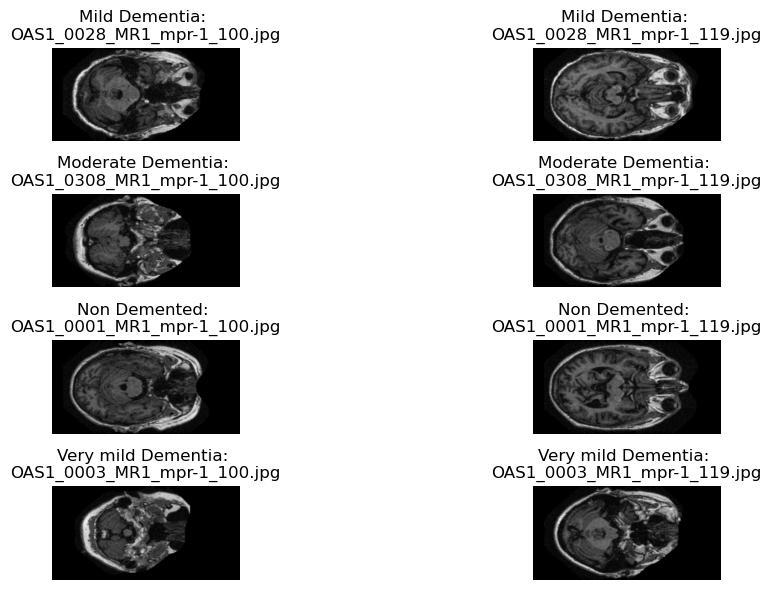

In [26]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the figure size to accommodate multiple images in one line
plt.figure(figsize=(12, 6))
# Indices of the images to display
indices_to_display = [0, 19]  # Indices start from 0

# Iterate over each subdirectory
for i, subdirectory in enumerate(classes, 1):
    # Get the list of image files in the subdirectory
    subdirectory_path = os.path.join(data_dir, subdirectory)
    image_files = [f for f in os.listdir(subdirectory_path) ]
    
    # Display the first image from the subdirectory
    if image_files:
        first_image_path = os.path.join(subdirectory_path, image_files[0])
        image = Image.open(first_image_path)
        
        
        # Display the image in a subplot
        #plt.subplot(1, len(classes), i)
        #plt.imshow(image)
        #plt.title(subdirectory)
        #plt.axis('off')

#plt.tight_layout()  # Adjust layout to prevent overlapping
#plt.show()

    # Select the images to display based on the specified indices
    image_files_to_display = [image_files[idx] for idx in indices_to_display if idx < len(image_files)]

    # Display each selected image from the subdirectory
    for j, image_file in enumerate(image_files_to_display, 1):
        image_path = os.path.join(subdirectory_path, image_file)
        image = Image.open(image_path)

        # Display the image in a subplot
        plt.subplot(len(classes), len(indices_to_display), (i-1)*len(indices_to_display) + j)
        plt.imshow(image)
        plt.title(f"{subdirectory}: \n{image_file}")  # Include subdirectory name and filename in the title
        plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
# initial split
#80% training and 20% testing sets.
X = images_flat
y = labels #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Class Non Demented: 67222 images
Class Mild Dementia: 5002 images
Class Moderate Dementia: 488 images
Class Non Demented: 67222 images
Class Very mild Dementia: 13725 images


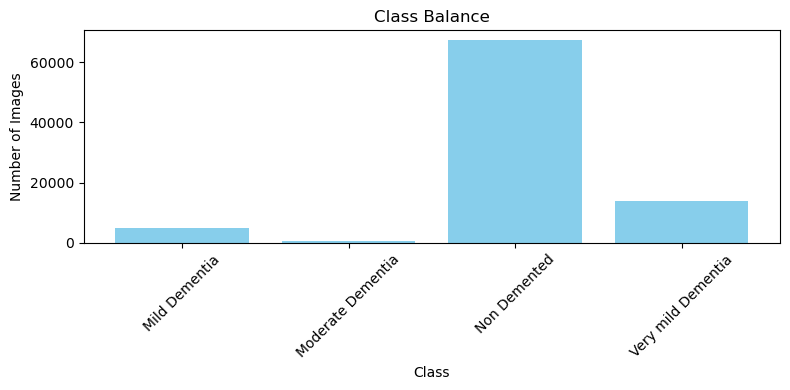

In [85]:
# Dictionary to store the count of images for each class
image_count_per_class = {}

# Iterate over each subdirectory using os.walk
for root, dirs, files in os.walk(data_dir):
    # Check if there are any image files in the current subdirectory
    for file in files:
        # Extract the class name from the directory path
        class_name = os.path.basename(root)
        # Count the number of image files in the current subdirectory
        image_count = sum(1 for file in files)
        # Store the count of images for the current class
        image_count_per_class[class_name] = image_count
        # Print the count of images for the current class
    print(f"Class {class_name}: {image_count} images")

# Plot the class balance for classes with images
if image_count_per_class:
    plt.figure(figsize=(6, 3))
    plt.bar(image_count_per_class.keys(), image_count_per_class.values(), color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Balance')
    plt.xticks(rotation=45)  # Rotate class names for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No image files found in the specified directory.")

#get more samples by rotating; oversampling for CNN, image classification

The dataset is unbalanced. 

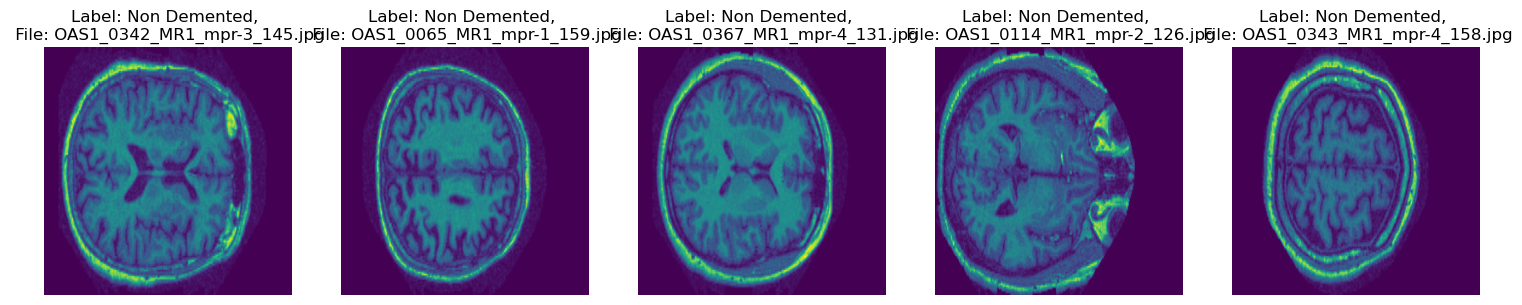

In [94]:
import cv2
# Initialize lists to store images, labels, and filenames
images = []
labels = []
filenames = []

# Loop through each folder in the directory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    image_counter = 0  # Counter to track the number of images selected from each subfolder
    
    # Loop through each image file in the folder
    for file_name in os.listdir(folder_path):
        #if image_counter >= 5:  # Check if 5 images have already been selected from this subfolder
           # break  # Break out of the loop if 5 images have been selected
        
        file_path = os.path.join(folder_path, file_name)
             
        # Load and preprocess the image using OpenCV
        image = cv2.imread(file_path)  # Load image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (299, 299))  # Resize to desired dimensions
        #image_array = np.array(image)  # Convert to numpy array
              
        # Append the image, label and filename to a list
        images.append(image)        
        labels.append(folder_name)        
        filenames.append(file_name)
        
        image_counter += 1  # Increment the image counter
    
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)
filenames = np.array(filenames)

# Shuffle the dataset
random_indices = np.random.permutation(len(images))
images = images[random_indices]
labels = labels[random_indices]
filenames = filenames[random_indices]

# Display some sample images from the dataset
def display_samples(images, labels, filenames, num_samples=3):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    # Randomly select num_samples images
    random_indices = np.random.choice(len(images), size=num_samples, replace=False)
    
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[idx])
        ax.set_title("Label: {}, \n File: {}".format(labels[idx], filenames[idx]))
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display some sample images from the dataset
display_samples(images, labels, filenames, num_samples=5)  # Display 5 samples per subfolder


In [53]:
labels

array(['Mild Dementia', 'Mild Dementia', 'Mild Dementia',
       'Moderate Dementia', 'Very mild Dementia', 'Very mild Dementia',
       'Moderate Dementia', 'Non Demented', 'Non Demented',
       'Mild Dementia', 'Very mild Dementia', 'Very mild Dementia',
       'Non Demented', 'Very mild Dementia', 'Moderate Dementia',
       'Moderate Dementia', 'Moderate Dementia', 'Mild Dementia',
       'Non Demented', 'Non Demented'], dtype='<U18')

In [95]:
# binary 01
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Step 1: Encode Labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
# Step 2: Apply One-Hot Encoding
one_hot_labels = to_categorical(encoded_labels)
print("Original labels:", labels[:5])
print("Encoded labels:", one_hot_labels[:5])

Original labels: ['Non Demented' 'Non Demented' 'Non Demented' 'Non Demented'
 'Non Demented']
Encoded labels: [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [96]:
# multiclass 0 to 3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define the mapping dictionary
mapping = {
    'Non Demented': 0,
    'Very mild Dementia': 1,
    'Mild Dementia': 2,
    'Moderate Dementia': 3
}

# Map the original labels to their corresponding numeric values
encoded_labels2 = [mapping[label] for label in labels]

# Print the first few original and encoded labels
print("Original labels:", labels[:5])
print("Encoded labels:", encoded_labels2[:5])

Original labels: ['Non Demented' 'Non Demented' 'Non Demented' 'Non Demented'
 'Non Demented']
Encoded labels: [0, 0, 0, 0, 0]


Label of image 0: Non Demented


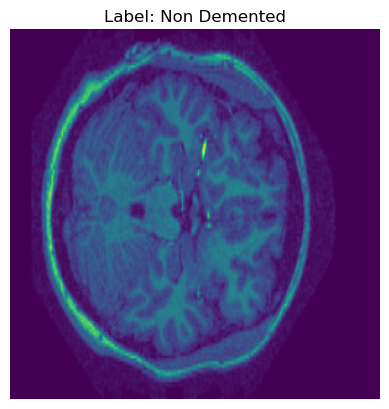

In [98]:
# label check
# Index of the image you want to inspect
image_index = 0  # image 1

# Print the label of the specified image
print("Label of image {}: {}".format(image_index, labels[image_index]))

# Display the image
plt.imshow(images[image_index])
plt.title('Label: {}'.format(labels[image_index]))
plt.axis('off')
plt.show()

# PCA

In [3]:
import numpy as np
from sklearn.decomposition import PCA

# Convert the list of images to a numpy array
#images_array = np.array(images)
# Reshape images to flatten them into 1D arrays
images_flat = images_array.reshape(images_array.shape[0], -1)

# Apply PCA while preserving 99% of variance
pca = PCA(0.99)
pca.fit_transform(images_flat)
images_pca = pca.fit_transform(images_flat)
# number of components required to preserve 99% of the variance
pca.n_components_

# Find reconstruction error for each image
def reconstruction_errors(pca, X_original):
    X_pca = pca.transform(X_original)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X_original).mean(axis=-1)
    #for i, error in enumerate(mse):
        #print(f"Image {i+1}: Reconstruction Error after PCA= {error}")
    return mse, X_reconstructed

mse, X_reconstructed = reconstruction_errors(pca, images_flat)

NameError: name 'images' is not defined

In [ ]:
#taking 5 random images from the original dataset, apply PCA and add noise to the subset
np.random.seed(42)

num_images_subset = 5
# Get the total number of images in the dataset
num_images_dataset = images_flat.shape[0]
# Define the indices of images from different parts of the dataset
indices_subset = np.random.choice(num_images_dataset, num_images_subset, replace=False)
# Create the subset by selecting images based on the indices
mri_sub = images_flat[indices_subset]

# Compute reconstruction errors for the subset
mse_sub, X_reconstructed_sub = reconstruction_errors(pca, mri_sub)
X_reconstructed_sub

Image 1: Reconstruction Error after PCA= 26.204955078106956
Image 2: Reconstruction Error after PCA= 9.097690177701582
Image 3: Reconstruction Error after PCA= 11.365144143942674
Image 4: Reconstruction Error after PCA= 27.220722203399458
Image 5: Reconstruction Error after PCA= 8.82884295488909


array([[-5.47572247e-12, -1.39231983e-13,  1.97648649e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.59562581e-13,  1.90439474e-12,  1.25210149e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.62754335e-12, -1.31209258e-12, -2.45312283e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.96542969e-14,  7.27501388e-13,  7.53255887e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.29551428e-12,  4.20394389e-13,  1.23303052e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
import sys
# Calculate the size of the original images array
original_size = sys.getsizeof(images_flat)
# Calculate the size of the PCA compressed images array
compressed_size = sys.getsizeof(images_pca)

print("Original size of images:", original_size, "bytes")
print("Compressed size of images:", compressed_size, "bytes")


Original size of images: 128 bytes
Compressed size of images: 128 bytes


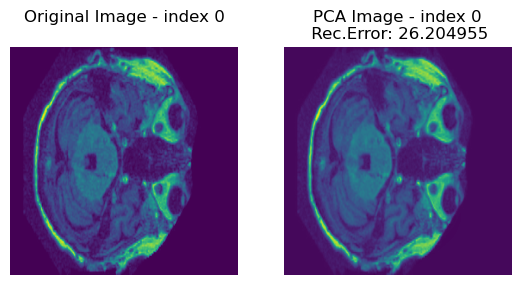

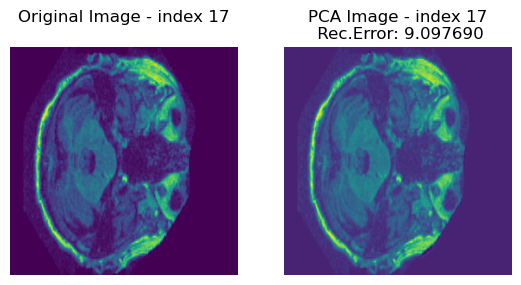

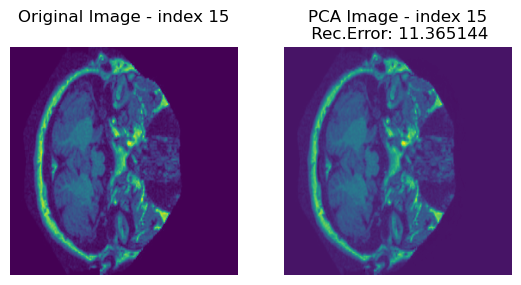

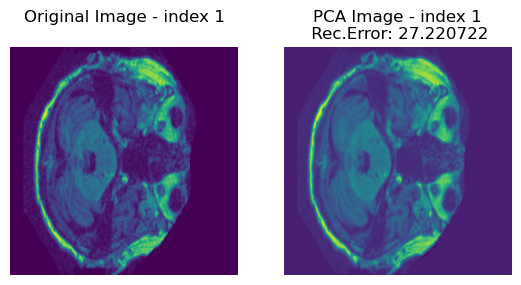

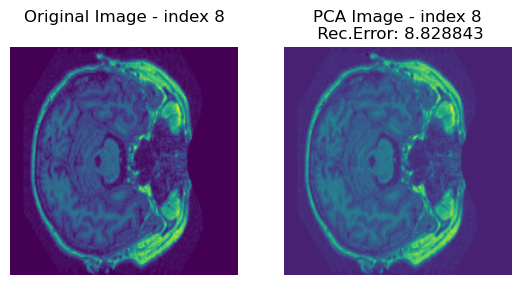

In [ ]:
# Plot original, PCA
## with indexing and reconstruction error
for i in range(num_images_subset):
    # Original image
    plt.figure(figsize=(10, 5))  
    plt.subplot(1, 3, 1)
    plt.imshow(mri_sub[i].reshape(299, 299))
    plt.title(f'Original Image - index {indices_subset[i]}\n  ', fontsize=12) 
    plt.axis('off')      
     # PCA image
    plt.subplot(1, 3, 2)
    plt.imshow(X_reconstructed_sub[i].reshape(299, 299))
    plt.title(f'PCA Image - index {indices_subset[i]}\n Rec.Error: {mse_sub[i]:.6f}', fontsize=12)  
    plt.axis('off')  

In [ ]:
# check size of the compressed images; compare size before and after. ?
# try hybrid sampling around 2000/2500; 
# what models to use?

# Train/Test split

In [1]:
# initial split
#80% training and 20% testing sets.
X = images_flat
y = labels #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

NameError: name 'images_flat' is not defined

In [ ]:
# initial split
#80% training and 20% testing sets.
X = images_pca
y = labels #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (16, 14)
Testing set size: (4, 14)


In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import numpy as np

# Define the number of samples to limit to
total_samples_limit = 10000

# Initialize SMOTE-ENN pipeline
pipeline = make_pipeline(SMOTE(), EditedNearestNeighbours())

# Generate synthetic samples and perform under-sampling
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Randomly select up to total_samples_limit samples
if len(y_resampled) > total_samples_limit:
    indices = np.random.choice(len(y_resampled), total_samples_limit, replace=False)
    X_resampled = X_resampled[indices]
    y_resampled = y_resampled[indices]

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

def evaluate_model(model, y_pred, y_test, avg='weighted'):
    """
    Plot the confusion matrix and print the classification report.
    
    Args:
    - model: The trained model (not used in the function but can be added if needed)
    - y_pred: Predicted labels
    - y_test: True labels
    """
    # Print evaluation metrics
    print("Overall Evaluation metrics:")
    print(f"Accuracy:   {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision:  {precision_score(y_test, y_pred, average=avg):.4f}")
    print(f"Recall:     {recall_score(y_test, y_pred, average=avg):.4f}")
    print(f"F1-score:   {f1_score(y_test, y_pred, average=avg):.4f}")

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Define the categories for the confusion matrix
    categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    
    # Calculate confusion matrix
    c = confusion_matrix(y_test, y_pred)
    
    # Define the categories for all four classes
    categories_all = ['Non', 'Very Mild', 'Mild', 'Moderate']
    
    # Convert confusion matrix to a DataFrame with categories_all
    confusion_df = pd.DataFrame(c, index=categories_all, columns=categories_all)
    
    # Plot the confusion matrix as a heatmap with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - ' + type(model).__name__)  # Use the model's name in the title
    plt.show()

    if model == 'lr':
        plt.xticks(rotation=90)

In [ ]:
"""Training, Prediction and evaluation - logistic regression"""

# Initialize and train the classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# Predict on the test set
y_pred_lr = lr.predict(X_test)
# Evaluate the classifier
print("Evaluation of Logistic regression model on Test Set:")
print("------------------------")
evaluate_model(lr, y_pred_lr, y_test, avg='weighted')

In [ ]:
# sample for CNN
# to add: libraries
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# the code continues. see more in class 13 DEMO CNN code